Basic classification of stadsarchief images
Network based on: https://towardsdatascience.com/build-your-own-convolution-neural-network-in-5-mins-4217c2cf964f

In [ ]:
import numpy as np
from PIL import Image
from scipy import misc
from data import load_data
import keras.backend as K

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.initializers import RandomUniform
from keras.layers import LeakyReLU

In [63]:
IMG_DIR = 'examples/0-src/200x200/';
LABEL_DIR = 'examples/0-src/labels/';  
    
[X, Ystr] = load_data(IMG_DIR, LABEL_DIR)

def shuffle(X, Y):
    indices = np.random.permutation(X.shape[0])
    X_shuffled = X[indices]
    Y_shuffled = Y[indices]
    return (X_shuffled, Y_shuffled)
print(X.shape)

X_shuffled, Y_shuffled = shuffle(X, Ystr)
print(X_shuffled.shape)
print(Y_shuffled.shape)
X = X_shuffled
Ystr = Y_shuffled

def simplify_Y(Y):
    return np.array([y if y == 'blueprint' else 'other' for y in Y])

# print(Ystr)
print(set(Ystr))
Ystr = simplify_Y(Ystr)
# print(Ystr)
print(set(Ystr))

first few files: ['examples/0-src/200x200/SA00086044_00002.jpg', 'examples/0-src/200x200/SA00086044_00003.jpg', 'examples/0-src/200x200/SA00086044_00004.jpg', 'examples/0-src/200x200/SA00086083_00001.jpg', 'examples/0-src/200x200/SA00086083_00002.jpg']
first labels   : ['examples/0-src/labels/SA00086044_00002.yaml', 'examples/0-src/labels/SA00086044_00003.yaml', 'examples/0-src/labels/SA00086044_00004.yaml', 'examples/0-src/labels/SA00086083_00001.yaml', 'examples/0-src/labels/SA00086083_00002.yaml']
(65, 200, 200, 3)
(65, 200, 200, 3)
(65,)
{'bouwaanvraag', 'map', 'bouwverordening', 'calculation', 'blueprint', 'other', 'kennisgeving', 'letter'}
{'other', 'blueprint'}


In [64]:
print(X.shape)
print(Ystr.shape)

types = list(set(Ystr))
num_classes = len(types)
print(f"number of classes: {num_classes}")
print(f"types encountered: {types}")

def convert_to_index(Y, types):
    return np.array([types.index(y) for y in Y])

print(Ystr[:3])
Yind = convert_to_index(Ystr, types)
print(Yind[:3])


(65, 200, 200, 3)
(65,)
number of classes: 2
types encountered: ['other', 'blueprint']
['other' 'other' 'other']
[0 0 0]


In [65]:
def set_class(Y, class_idx):
    print(Y)
    Y[:] = class_idx
    print(Y)
    return Y
# YInd = set_class(Yind, 0)

In [66]:
Y = keras.utils.to_categorical(Yind, num_classes)  # convert class vectors to binary class matrices
print(Y.shape)

(65, 2)


In [67]:
def split_data(X, Y, size):
    X_train = X[:N]
    Y_train = Y[:N]
    X_test = X[N:]
    Y_test = Y[N:]
    return (X_train, Y_train), (X_test, Y_test)


img_dim = (200, 200, 3);
N = 40
(X_train, Y_train), (X_test, Y_test) = split_data(X, Y, N)
print("")
print("split data shapes:")
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


split data shapes:
(40, 200, 200, 3)
(40, 2)
(25, 200, 200, 3)
(25, 2)


In [7]:
def list_stats(X, Y):
    Yidx = np.argmax(Y, axis=1)
    unique, counts = np.unique(Yidx, return_counts=True)
    print(dict(zip(unique, counts)))
print("train: ")
list_stats(X_train, Y_train)
print("test: ")
list_stats(X_test, Y_test)

train: 
{0: 26, 1: 14}
test: 
{0: 19, 1: 6}


In [68]:
resize = 20
print("split data shapes:")
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
X_train = X_train[:, :resize, :resize, :]
X_test = X_test[:, :resize, :resize, :]
print("split data shapes:")
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
img_dim = (resize, resize, 3);

split data shapes:
(40, 200, 200, 3)
(40, 2)
(25, 200, 200, 3)
(25, 2)
split data shapes:
(40, 20, 20, 3)
(40, 2)
(25, 20, 20, 3)
(25, 2)


In [69]:
# def build_model(num_classes, img_dim):
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3),
#                      activation='relu',
#                      input_shape=img_dim))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation='softmax'))
#     return model

def build_model(num_classes, img_dim):
    print(img_dim)
    model = Sequential()
    model.add(Conv2D(2, kernel_size=(3, 3),
                     activation='linear',
                     input_shape=img_dim,
                     kernel_initializer = RandomUniform()
                    ))
    model.add(LeakyReLU())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

    model.add(Flatten())    
#     model.add(Flatten(input_shape=img_dim))
    model.add(Dense(16, activation='linear', kernel_initializer = RandomUniform()))
    model.add(LeakyReLU())
#     model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model
model = build_model(num_classes, img_dim)
model.summary()

(20, 20, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 18, 18, 2)         56        
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 18, 18, 2)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 648)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                10384     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 34        
Total params: 10,474
Trainable params: 10,474
Non-trainable params: 0
____________________________________________________________

In [70]:
batch_size = 100
epochs = 200

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def train(model, X_train, Y_train, X_test, Y_test, batch_size, epochs):
    model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
             optimizer=keras.optimizers.Adam(
                 lr=0.0003,
# #                  lr=1e-2,
# #                  epsilon=1e-6
             ),
              metrics=['accuracy', mean_pred])

    model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              
    validation_data=(X_test, Y_test))
train(model, X_train, Y_train, X_test, Y_test, batch_size, epochs)

Train on 40 samples, validate on 25 samples
Epoch 1/200
40/40 [==============================] - 1s 13ms/step - loss: 4.0637 - acc: 0.3750 - mean_pred: 0.5000 - val_loss: 1.3257 - val_acc: 0.4000 - val_mean_pred: 0.5000
Epoch 2/200
40/40 [==============================] - 0s 157us/step - loss: 1.9778 - acc: 0.3000 - mean_pred: 0.5000 - val_loss: 0.8469 - val_acc: 0.8000 - val_mean_pred: 0.5000
Epoch 3/200
40/40 [==============================] - 0s 149us/step - loss: 1.6730 - acc: 0.5750 - mean_pred: 0.5000 - val_loss: 0.9656 - val_acc: 0.8000 - val_mean_pred: 0.5000
Epoch 4/200
40/40 [==============================] - 0s 151us/step - loss: 1.8423 - acc: 0.5750 - mean_pred: 0.5000 - val_loss: 0.9666 - val_acc: 0.8000 - val_mean_pred: 0.5000
Epoch 5/200
40/40 [==============================] - 0s 144us/step - loss: 1.8126 - acc: 0.6250 - mean_pred: 0.5000 - val_loss: 0.8775 - val_acc: 0.8400 - val_mean_pred: 0.5000
Epoch 6/200
40/40 [==============================] - 0s 136us/step - los

Epoch 47/200
40/40 [==============================] - 0s 138us/step - loss: 0.1925 - acc: 0.9000 - mean_pred: 0.5000 - val_loss: 0.0924 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 48/200
40/40 [==============================] - 0s 164us/step - loss: 0.1890 - acc: 0.9250 - mean_pred: 0.5000 - val_loss: 0.0905 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 49/200
40/40 [==============================] - 0s 187us/step - loss: 0.1874 - acc: 0.9250 - mean_pred: 0.5000 - val_loss: 0.0901 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 50/200
40/40 [==============================] - 0s 151us/step - loss: 0.1869 - acc: 0.9250 - mean_pred: 0.5000 - val_loss: 0.0904 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 51/200
40/40 [==============================] - 0s 179us/step - loss: 0.1869 - acc: 0.9250 - mean_pred: 0.5000 - val_loss: 0.0905 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 52/200
40/40 [==============================] - 0s 156us/step - loss: 0.1869 - acc: 0.9250 - mean_pred: 

40/40 [==============================] - 0s 139us/step - loss: 0.1431 - acc: 0.9250 - mean_pred: 0.5000 - val_loss: 0.0678 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 94/200
40/40 [==============================] - 0s 139us/step - loss: 0.1423 - acc: 0.9250 - mean_pred: 0.5000 - val_loss: 0.0676 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 95/200
40/40 [==============================] - 0s 143us/step - loss: 0.1414 - acc: 0.9250 - mean_pred: 0.5000 - val_loss: 0.0677 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 96/200
40/40 [==============================] - 0s 162us/step - loss: 0.1405 - acc: 0.9250 - mean_pred: 0.5000 - val_loss: 0.0677 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 97/200
40/40 [==============================] - 0s 146us/step - loss: 0.1396 - acc: 0.9250 - mean_pred: 0.5000 - val_loss: 0.0678 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 98/200
40/40 [==============================] - 0s 130us/step - loss: 0.1388 - acc: 0.9250 - mean_pred: 0.5000 - val_

Epoch 139/200
40/40 [==============================] - 0s 150us/step - loss: 0.1049 - acc: 0.9500 - mean_pred: 0.5000 - val_loss: 0.0606 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 140/200
40/40 [==============================] - 0s 144us/step - loss: 0.1041 - acc: 0.9500 - mean_pred: 0.5000 - val_loss: 0.0607 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 141/200
40/40 [==============================] - 0s 127us/step - loss: 0.1032 - acc: 0.9500 - mean_pred: 0.5000 - val_loss: 0.0611 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 142/200
40/40 [==============================] - 0s 125us/step - loss: 0.1023 - acc: 0.9500 - mean_pred: 0.5000 - val_loss: 0.0617 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 143/200
40/40 [==============================] - 0s 148us/step - loss: 0.1013 - acc: 0.9500 - mean_pred: 0.5000 - val_loss: 0.0623 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 144/200
40/40 [==============================] - 0s 131us/step - loss: 0.1002 - acc: 0.9500 - mean_

Epoch 185/200
40/40 [==============================] - 0s 136us/step - loss: 0.0687 - acc: 0.9750 - mean_pred: 0.5000 - val_loss: 0.0534 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 186/200
40/40 [==============================] - 0s 118us/step - loss: 0.0682 - acc: 0.9750 - mean_pred: 0.5000 - val_loss: 0.0534 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 187/200
40/40 [==============================] - 0s 130us/step - loss: 0.0677 - acc: 0.9750 - mean_pred: 0.5000 - val_loss: 0.0531 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 188/200
40/40 [==============================] - 0s 121us/step - loss: 0.0673 - acc: 0.9750 - mean_pred: 0.5000 - val_loss: 0.0527 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 189/200
40/40 [==============================] - 0s 129us/step - loss: 0.0668 - acc: 0.9750 - mean_pred: 0.5000 - val_loss: 0.0524 - val_acc: 1.0000 - val_mean_pred: 0.5000
Epoch 190/200
40/40 [==============================] - 0s 129us/step - loss: 0.0663 - acc: 0.9750 - mean_

In [71]:
score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train loss: 0.06152468919754028
Train accuracy: 0.975
Test loss: 0.05168858543038368
Test accuracy: 1.0


In [72]:
print("train predictions, truth")
print(model.predict_classes(X_train))
print(np.argmax(Y_train, axis=1))

print("test predictions, truth")
print(model.predict_classes(X_test))
print(np.argmax(Y_test, axis=1))

train predictions, truth
[0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 1 1]
[0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 1 1]
test predictions, truth
[0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0]


In [55]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def show_image(data, idx):
    image=X_train[idx, :, :, :]
#     print(image.shape)
#     img = Image.fromarray(image, 'RGB')
#     img.show()
    plt.axis("off")
    plt.imshow(image)
    plt.show()

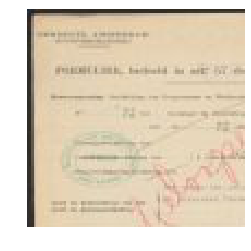

In [60]:
show_image(X_test, 5)